In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
# Gerar dados sintéticos
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 1) * 10
noise = np.random.randn(n_samples, 1) * 5

y = 0.5 * X**3 - 2 * X**2 + 3 * X + noise

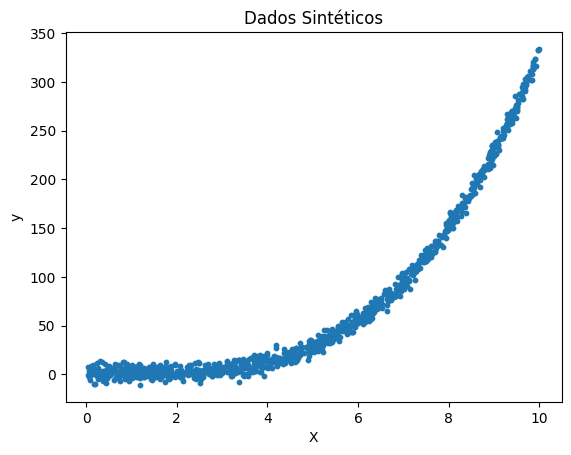

In [3]:
# Visualizar os dados gerados
plt.scatter(X, y, s=10)
plt.title("Dados Sintéticos")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


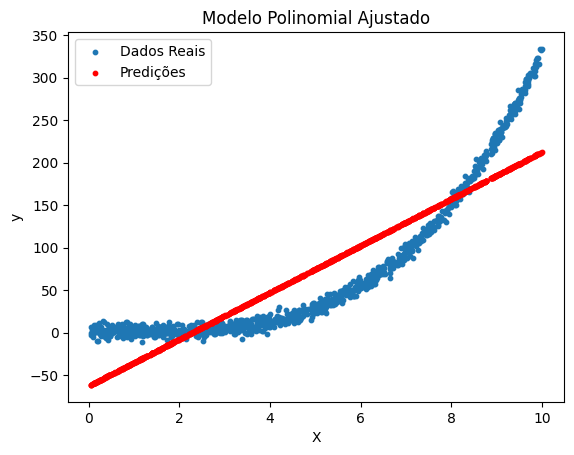

Mean Squared Error (MSE): 1774.02
Mean Absolute Error (MAE): 36.18
R-squared (R²): 0.7845
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     3633.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:54:18   Log-Likelihood:                -5159.4
No. Observations:                1000   AIC:                         1.032e+04
Df Residuals:                     998   BIC:                         1.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [4]:
# Criar transformador polinomial de grau 3
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Avaliar o modelo com MSE, MAE e R²
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualizar o ajuste do modelo
plt.scatter(X, y, s=10, label="Dados Reais")
plt.scatter(X, y_pred, color='r', s=10, label="Predições")
plt.title("Modelo Polinomial Ajustado")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Calcular os valores-p e coeficientes usando statsmodels
X_sm = sm.add_constant(X)  # Adiciona uma constante para o intercepto
model_sm = sm.OLS(y, X_sm).fit()

# Exibir o resumo dos resultados estatísticos
print(model_sm.summary())

# Teste de Breusch-Pagan para homocedasticidade
residuos = model_sm.resid
predicoes = model_sm.fittedvalues

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_sm)

# Exibir os resultados do teste
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
for label, value in zip(labels, bp_test):
    print(f"{label}: {value:.4f}")

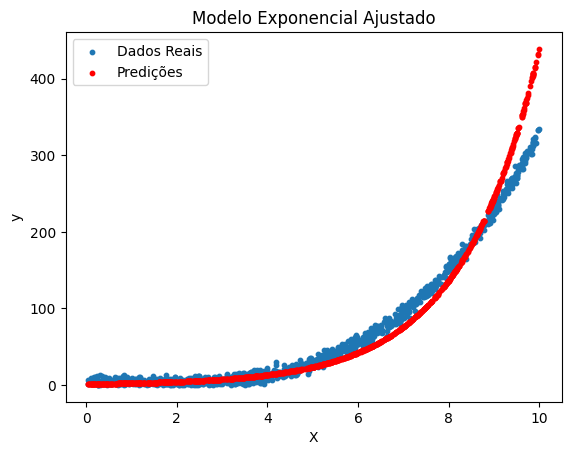

Mean Squared Error (MSE): 438.78
Mean Absolute Error (MAE): 12.13
R-squared (R²): 0.9461
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     5284.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:54:18   Log-Likelihood:                -1122.6
No. Observations:                1000   AIC:                             2249.
Df Residuals:                     998   BIC:                             2259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Aplicar a transformação logarítmica em y
y = np.abs(y)  # Take the absolute value of y

y_log = np.log(y) # Add a small constant to avoid log(0)

# Ajustar o modelo de regressão linear para X e log(y)
model = LinearRegression()
model.fit(X, y_log)

# Fazer previsões no espaço transformado (log)
y_log_pred = model.predict(X)

# Reverter a transformação logarítmica para obter as previsões no espaço original
y_pred = np.exp(y_log_pred)

# Visualizar o ajuste do modelo
plt.scatter(X, y, s=10, label="Dados Reais")
plt.scatter(X, y_pred, color='r', s=10, label="Predições")
plt.title("Modelo Exponencial Ajustado")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Avaliar o modelo com MSE, MAE e R² no espaço original
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Calcular os valores-p e coeficientes usando statsmodels
X_sm = sm.add_constant(X)  # Adiciona uma constante para o intercepto
model_sm = sm.OLS(y_log, X_sm).fit()

# Exibir o resumo dos resultados estatísticos
print(model_sm.summary())

# Teste de Breusch-Pagan para homocedasticidade
residuos = model_sm.resid
predicoes = model_sm.fittedvalues

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_sm)

# Exibir os resultados do teste
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
for label, value in zip(labels, bp_test):
    print(f"{label}: {value:.4f}")

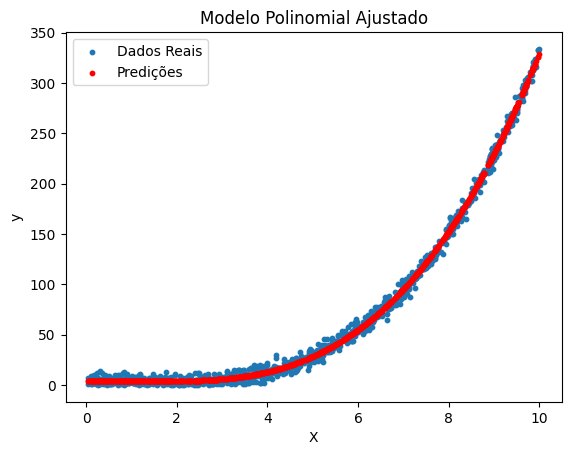

Mean Squared Error (MSE): 20.16
Mean Absolute Error (MAE): 3.55
R-squared (R²): 0.9975
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.338e+05
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:54:19   Log-Likelihood:                -2920.8
No. Observations:                1000   AIC:                             5850.
Df Residuals:                     996   BIC:                             5869.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [6]:
# Criar transformador polinomial de grau 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Visualizar o ajuste do modelo
plt.scatter(X, y, s=10, label="Dados Reais")
plt.scatter(X, y_pred, color='r', s=10, label="Predições")
plt.title("Modelo Polinomial Ajustado")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Avaliar o modelo com MSE, MAE e R²
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Calcular os valores-p e coeficientes usando statsmodels
X_poly_sm = sm.add_constant(X_poly)  # Adiciona uma constante para o intercepto
model_sm = sm.OLS(y, X_poly_sm).fit()

# Exibir o resumo dos resultados estatísticos
print(model_sm.summary())

# Teste de Breusch-Pagan para homocedasticidade
residuos = model_sm.resid
predicoes = model_sm.fittedvalues

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_sm)

# Exibir os resultados do teste
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
for label, value in zip(labels, bp_test):
    print(f"{label}: {value:.4f}")

Text(0, 0.5, 'Resíduo')

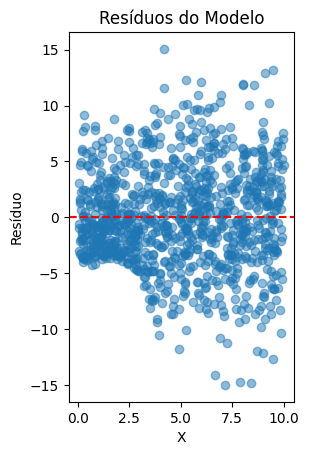

In [7]:
# Gráfico de resíduos
plt.subplot(1, 2, 1)
plt.scatter(X, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do Modelo')
plt.xlabel('X')
plt.ylabel('Resíduo')